# ALGORITMO GENÉTICO PARA OTIMIZAR CAMPANHAS DE MARKETING

Uma empresa de comércio eletrônico quer maximizar o lucro de suas campanhas de marketing. Para isso, ela pode investir em diferentes canais de marketing: TikTok, Facebook, Instagram, Email Marketing, Influenciadores Digitais e YouTube.

Objetivo: Distribuir o orçamento de marketing de forma a maximizar o lucro, considerando o custo por conversão, o número esperado de conversões por $1000 e o lucro por conversão. TODOS OS DADOS SÃO FICTÍCIOS.

Neste código, implementei elitismo e crossover juntos. O elitismo foi feito para selecionar os n melhores indivíduos de uma geração x e passar automaticamente estes indivíduos para a próxima geração (x+1). No crossover, todos os indivíduos da geração x, inclusive os que foram selecionados para a próxima geração (x+1), participaram do sorteio para serem pais pelo método da roleta viciada. Assim, passo os melhores indivíduos para a próxima geração e ainda garanto no crossover poder ter genes bons de algum cromossomo que tem a maior parte dos genes ruins, ou seja, há maior diversidade por não eliminar os cromossomos "ruins" antes do crossover, permitindo preservar algumas características deles para as próximas gerações.

In [37]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Dados fictícios 
data = {
    'Canal': ['TikTok', 'Facebook', 'Instagram', 'Email Marketing', 'Influenciadores Digitais', 'YouTube'],
    'Custo por Conversão ($)': [55, 60, 70, 40, 100, 65],
    'Conversões Estimadas por $1000': [18, 17, 15, 25, 10, 16],
    'Receita Média por Conversão ($)': [80, 90, 100, 50, 150, 95],
    'Lucro Médio por Conversão ($)': [25, 30, 30, 10, 50, 30],
    'Orçamento Máximo Disponível ($)': [45000, 40000, 30000, 20000, 25000, 35000]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Exibir DataFrame
display(df)

,Canal,Custo por Conversão ($),Conversões Estimadas por $1000,Receita Média por Conversão ($),Lucro Médio por Conversão ($),Orçamento Máximo Disponível ($)
0,TikTok,55,18,80,25,45000
1,Facebook,60,17,90,30,40000
2,Instagram,70,15,100,30,30000
3,Email Marketing,40,25,50,10,20000
4,Influenciadores Digitais,100,10,150,50,25000
5,YouTube,65,16,95,30,35000


### Gera indivíduo

Os indivíduos serão listas com 6 valores (genes), cada um indicando os investimentos em um tipo de campanha de marketing.

In [38]:
def cromossomo(tamanho_crom):
    cromossomo = []
    while True:
        cromossomo = []
        for i in range(tamanho_crom):
            cromossomo.append(round(random.uniform(0,45000), 2))
            
        if cromossomo[0] <= 45000 and cromossomo[1] <=40000 and cromossomo[2] <=30000 and cromossomo[3] <=20000 and cromossomo[4] <=25000 and cromossomo[5] <=35000:
            return cromossomo

In [39]:
cromossomo(6)

[1576.1, 32472.1, 10282.32, 10167.9, 12419.87, 2244.96]

Gera população

In [40]:
def gerar_populacao(tamanho_pop, tamanho_crom):
    populacao = []

    for i in range(tamanho_pop):
        crom = cromossomo(tamanho_crom)
        populacao.append(crom)

    return populacao

In [41]:
gerar_populacao(10, 6)

[[18941.51, 11297.17, 5078.04, 3007.62, 2900.45, 974.96],
 [5035.05, 1456.92, 6508.57, 6812.66, 18518.03, 7982.05],
 [2804.93, 627.43, 15154.68, 3563.77, 5554.01, 9865.49],
 [26330.24, 19183.06, 16406.63, 13947.53, 8228.74, 11723.67],
 [4833.22, 11457.91, 20838.53, 14714.51, 14855.35, 27867.74],
 [40622.54, 22704.38, 23063.72, 14588.7, 14907.34, 2291.64],
 [545.02, 18818.63, 28614.55, 17807.9, 3881.55, 12411.39],
 [30971.97, 23449.69, 19989.2, 16013.42, 11710.85, 20620.65],
 [2084.91, 24864.76, 18906.74, 18627.52, 224.53, 21604.4],
 [36765.31, 13825.34, 15341.83, 1291.1, 20072.25, 10327.37]]

Função fitness

In [42]:
def fitness(cromossomo):
    lucro = 0

    if cromossomo[0] > 45000 or cromossomo[1] > 40000 or cromossomo[2] > 30000 or cromossomo[3] > 20000 or cromossomo[4] > 25000 or cromossomo[5] > 35000:
        return 1
    else:
        for indice, valor in enumerate(cromossomo):
            lucro += valor/1000 * df.iloc[indice]['Conversões Estimadas por $1000'] * df.iloc[indice]['Lucro Médio por Conversão ($)']

    return lucro


In [43]:
c = cromossomo(6)
lucro1 = fitness(c)
print(c)
c[1] = 50000

lucro2 = fitness(c)
print(c)

print(lucro1)
print(lucro2)

[907.49, 25536.91, 25565.19, 6678.87, 12814.03, 8541.45]
[907.49, 50000, 25565.19, 6678.87, 12814.03, 8541.45]
37113.158599999995
1


Melhor indivíduo

In [44]:
def seleciona_melhor(populacao):
    melhor_cromosomo = populacao[0]
    melhor_lucro = fitness(melhor_cromosomo)
    for i in range(1, len(populacao)):
        if melhor_lucro < fitness(populacao[i]):
                melhor_cromosomo = populacao[i]
                melhor_lucro = fitness(populacao[i])

    return melhor_lucro, melhor_cromosomo

In [45]:
print(seleciona_melhor(gerar_populacao(10, 6)))

(65274.683699999994, [38950.2, 27524.34, 24451.4, 19218.17, 10728.71, 26120.11])


Elitismo

In [46]:
# Selecionando os n melhores indivíduos que quero que continuem na próxima geração

def elitismo(populacao, nMelhores):
    avaliados = [(fitness(cromossomo), cromossomo) for cromossomo in populacao]
    ordenados = sorted(avaliados, reverse=True)
    escolhidos = [cromossomo for _, cromossomo in ordenados[:nMelhores]]

    return escolhidos


In [47]:
escolhidos = elitismo(gerar_populacao(10, 6), 4)

for i in escolhidos:
    print(i)

[36015.17, 18263.89, 21555.12, 16221.44, 18060.24, 21580.13]
[44996.04, 14580.25, 13451.74, 8815.16, 22369.63, 23769.97]
[36750.26, 28563.44, 6930.59, 17738.12, 22901.33, 5136.76]
[20270.6, 39512.59, 25641.75, 7420.12, 6509.01, 8007.06]


Seleção dos pais pela roleta viciada

In [48]:
def soma_avaliacoes(populacao):
    soma_avalicao = 0
    for individuo in populacao:
        soma_avalicao += fitness(individuo)
    return soma_avalicao


def seleciona_pai(soma_avaliacao, populacao):
    pai = -1 # nao selecionou nenhum individuo ainda
    valor_sorteado = random.random() * soma_avaliacao # Simula a roleta sendo girada
    soma = 0
    i = 0
    # Os inviduos menos aptos tem nota 1, então dificilmente serão escolhidos na roleta
    while i < len(populacao) and soma < valor_sorteado:
        soma += fitness(populacao[i])
        pai += 1
        i += 1
    return pai
    

Crossover

In [49]:
def crossover(pai1, pai2):
    ponto_crossover = random.randint(0, len(pai1) - 1)  # Escolhe um ponto de crossover
    filho = []
    filho = [0.6 * pai1[i] + 0.4 * pai2[i] if i < ponto_crossover else 0.4 * pai1[i] + 0.6 * pai2[i] for i in range(len(pai1))]
    return filho


Mutação

In [50]:
def mutacao(cromossomo, taxa_mutacao):
        
        for i in range(len(cromossomo)):
            if random.random() < taxa_mutacao:
                if random.random() < 0.5:
                    cromossomo[i] *= 1.1
                else:
                    cromossomo[i] *= 0.9

        return cromossomo

Restaurando o tamanho da população

In [51]:
def nova_populacao(populacao, taxa_mutacao, nMelhores, pai1, pai2):
    # O elitismo é aplicado para selecionar o melhor indivíduo e gerar n clones dele
    # O crossover é aplicado selecionando indivíduos entre toda a populaçao atual
    nova_populacao = elitismo(populacao, nMelhores)

    while len(nova_populacao) < len(populacao):
        novo_cromo = crossover(pai1, pai2)
        nova_populacao.append(mutacao(novo_cromo, taxa_mutacao))

    return nova_populacao


## EXECUÇÃO DO ALGORITMO

In [52]:
def alg_genetico(geracoes, tamanho_pop):
    melhores = []
    nova_pop = []
    pop = gerar_populacao(tamanho_pop,6) # Criando 10 cromossomos com 6 genes
    melhores.append(seleciona_melhor(pop))
    
    for i in range(geracoes):
        soma_avaliacao = soma_avaliacoes(pop)
        pai1 = seleciona_pai(soma_avaliacao, pop)
        pai2 = seleciona_pai(soma_avaliacao, pop)
        nova_pop = nova_populacao(pop, 0.1, round(tamanho_pop*0.15), pop[pai1], pop[pai2])
        melhores.append(seleciona_melhor(nova_pop))
        pop = nova_pop
    
    return melhores

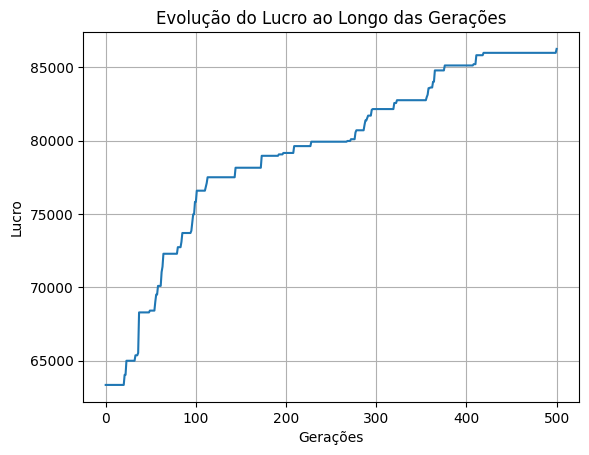

In [53]:
# Execução do algoritmo
melhores = alg_genetico(500, 50)

# Extração dos valores de lucro dos melhores cromossomos
lucros = [lucro for lucro, cromossomo in melhores]

# Criação do gráfico de linhas
plt.plot(lucros)
plt.xlabel('Gerações')
plt.ylabel('Lucro')
plt.title('Evolução do Lucro ao Longo das Gerações')
plt.grid(True)
plt.show()

In [54]:
max(melhores)

(86259.77003918565,
 [43989.49982563952,
  39485.23718357716,
  28616.945565142843,
  19262.305860818917,
  24837.89558520394,
  33780.98831646361])